# Homework 4

In [2]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import math
from math import exp

1) Simple linear regression. Fit the data in `prob2.txt` with a straight line. Plot to verify.

Slope (m): 1.2484934081708499
Intercept (b): 6.49963604117915


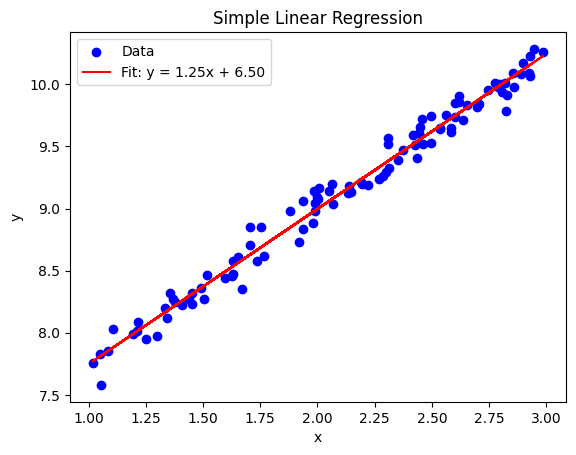

In [5]:
x, y = np.loadtxt('prob2.txt')

# Compute the best-fit line coefficients (slope m and intercept b)
m, b = np.polyfit(x, y, 1)

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Compute the fitted line
y_fit = m * x + b

# Plot
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_fit, color='red', label=f'Fit: y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()


2) Load the data in `prob4.txt`. We want to fit this data with the following function 

$$f(x) = a e^{-x} + c$$

where $a$ and $c$ are parameters. 

Find the $a$ and $c$ that give you the "best fit".

Make a plot to verify the answer.

a = 3.0784044315901626
c = 1.4148324328804236


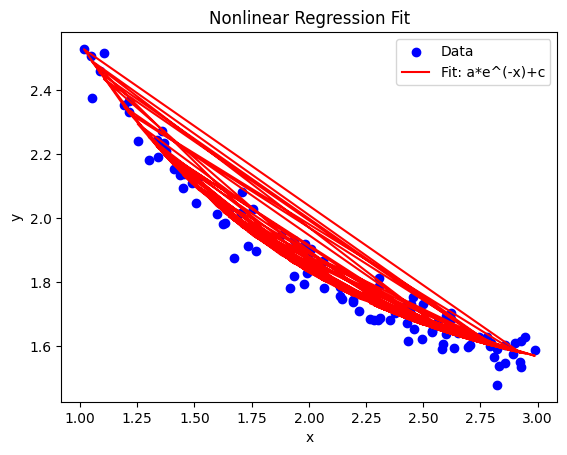

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function
def model(x, a, c):
    return a * np.exp(-x) + c

# Load the data
x, y = np.loadtxt('prob4.txt')

# Use curve_fit to find best a and c
params, covariance = curve_fit(model, x, y)
a, c = params

print(f"a = {a}")
print(f"c = {c}")

# Compute fitted values
y_fit = model(x, a, c)

# Plot
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_fit, color='red', label=f'Fit: a*e^(-x)+c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Nonlinear Regression Fit')
plt.show()


3) Shipyard. ship_speed_fuel.csv and ship_speed_fuel.txt contains data for fuel consumption and ship speed. You can load them up using loadtxt like shown below.

    Variable Names
    ship_leg (1-5)
    speed    (knots)
    fuel     (tons/day)
    
The plot below show clearly that there are two kinds of ship: small ship and a big ship. 

Source: S.Wang, Q. Meng (2012). "Sailing Speed Optimization for Container
Ships in a Liner Shipping Network," 

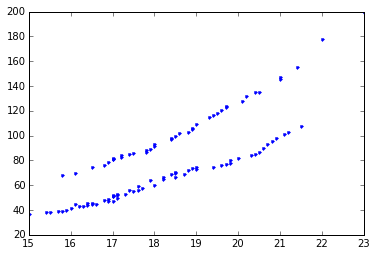

In [33]:
ship = np.loadtxt(open("ship_speed_fuel.csv","rb"), delimiter=',', skiprows=1)
#try to figure out what exactly is in the ship variable
#see ship_speed_fuel.text for the meaning of each column
shipno = ship[:, 0]
speed = ship[:, 1]
fuel = ship[:, 2]
plt.plot(speed, fuel,'.')

3.1) Physics dictates that the bigger the ship the more power it needs to maintain a fixed speed. Figure out which ship 1,2,3,4,5 is a big ship and which ship is a small ship.

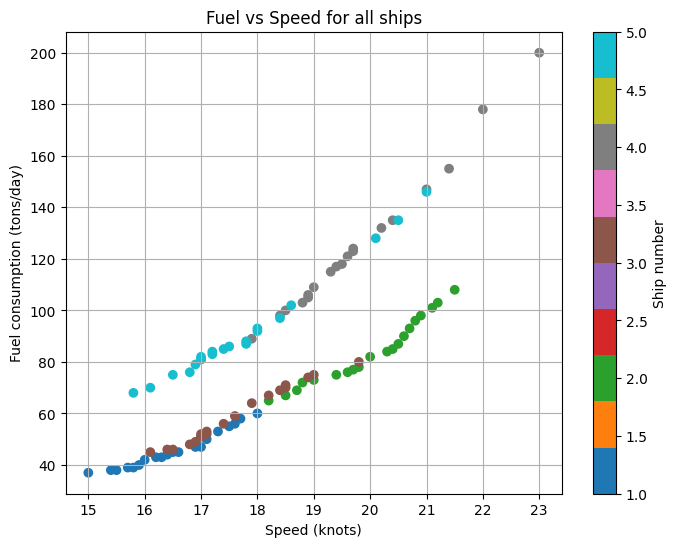

In [11]:
ship = np.loadtxt(open("ship_speed_fuel.csv", "rb"), delimiter=",", skiprows=1)

# Split into columns
ship_leg = ship[:, 0]   # ship number (1–5)
speed = ship[:, 1]      # knots
fuel = ship[:, 2]       # tons/day

# Plot all ships (each ship has its own color)
plt.figure(figsize=(8,6))
scatter = plt.scatter(speed, fuel, c=ship_leg, cmap='tab10')
plt.xlabel("Speed (knots)")
plt.ylabel("Fuel consumption (tons/day)")
plt.title("Fuel vs Speed for all ships")
plt.colorbar(scatter, label="Ship number")
plt.grid(True)
plt.show()

3.2) The ship fuel consumption, $c$, for a given speed, $v$ can be modeled with

$$c = a v^b$$

where $a$ and $b$ are parameter you need to find for best fit.

This relation, is however not linear. It nees some manipulation to make it linear. We can take $\ln$ on both side and obtain

$$\ln c = b \ln v + \ln a$$

which is a linear relation. Your job for this one is to find $a$ and $b$ for big ship and small ship. Plot to verify. (You should have two set of parameters one for big ship and one for small ship).

Ship 1: a = 0.014, b = 2.892
Ship 2: a = 0.010, b = 3.002
Ship 3: a = 0.004, b = 3.314
Ship 4: a = 0.011, b = 3.118
Ship 5: a = 0.037, b = 2.709


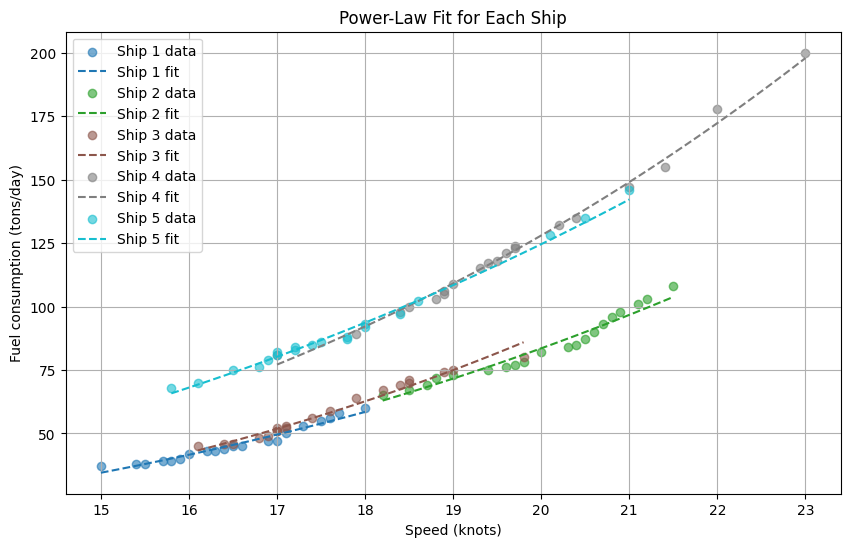

In [12]:
def fit_power_model(speed, fuel):
    """Perform linear regression on ln(c) = b*ln(v) + ln(a)."""
    ln_v = np.log(speed)
    ln_c = np.log(fuel)
    b, ln_a = np.polyfit(ln_v, ln_c, 1)  # slope = b, intercept = ln(a)
    a = np.exp(ln_a)
    return a, b

# Compute parameters (a, b) for each ship
ships = np.unique(ship_leg)
params = {}

for s in ships:
    mask = (ship_leg == s)
    a, b = fit_power_model(speed[mask], fuel[mask])
    params[int(s)] = (a, b)
    print(f"Ship {int(s)}: a = {a:.3f}, b = {b:.3f}")

# Plot the fitted curves vs data
plt.figure(figsize=(10,6))
colors = plt.cm.tab10(np.linspace(0, 1, len(ships)))

for i, s in enumerate(ships):
    mask = (ship_leg == s)
    a, b = params[int(s)]
    v_fit = np.linspace(min(speed[mask]), max(speed[mask]), 100)
    c_fit = a * v_fit**b
    plt.scatter(speed[mask], fuel[mask], color=colors[i], label=f'Ship {int(s)} data', alpha=0.6)
    plt.plot(v_fit, c_fit, color=colors[i], linestyle='--', label=f'Ship {int(s)} fit')

plt.xlabel("Speed (knots)")
plt.ylabel("Fuel consumption (tons/day)")
plt.title("Power-Law Fit for Each Ship")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
small_ships = [1, 2]  # 3000 TEU
big_ships = [3, 4, 5] # 5000–8000 TEU

print("\nSummary:")
for s in small_ships:
    a, b = params[s]
    print(f"Small Ship {s}: a = {a:.3f}, b = {b:.3f}")
for s in big_ships:
    a, b = params[s]
    print(f"Big Ship {s}: a = {a:.3f}, b = {b:.3f}")


Summary:
Small Ship 1: a = 0.014, b = 2.892
Small Ship 2: a = 0.010, b = 3.002
Big Ship 3: a = 0.004, b = 3.314
Big Ship 4: a = 0.011, b = 3.118
Big Ship 5: a = 0.037, b = 2.709


3.3) (Optional, for fun only.) Suppose that he small ship can carry 1000 tons of good while big ship can carry 2000 tons of good. The cost of ship fuel(bunker) is about 250 Dollar per metric tons. Company normally charge about 0.10 Dollar per ton of good per mile travel.

The faster your ship goes the more trip you can make the more revenue you can get. Yet, at the same time the trip will cost you more cost on fuel.

Your job is to figure out what speed you need to run the ship at for maximum profit and which ship is better for you.

4) Noisy peak finding.

Finding peak in a noisy data is a very common task in analyzing physical from sensors. Consider the following data shown below.

Your task for this problem is to find the peak position and peak height from noisy data. There are 10 dataset make sure you succeed in finding **all** the peak in at least 9.

```python
def find_peaks(xs, ys):
    return [(xpeak, ypeak), (xpeak, ypeak), ...]
```

Here are some hints:
- You should first find candidates for peak in noisy data.
- Fit the peak(and neighbor) with parabola
- Make sure the parameter from the fitted parabola actually indicate that it is a peak.
- Then use the parameter from the fitted parabola to find the peak location and height. (Recall High School Math)


✅ Successfully detected peaks in 9/9 datasets


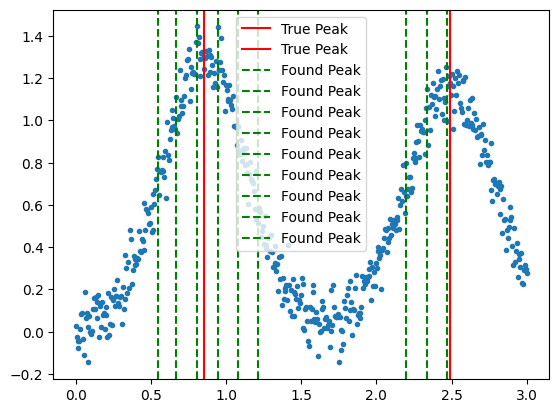

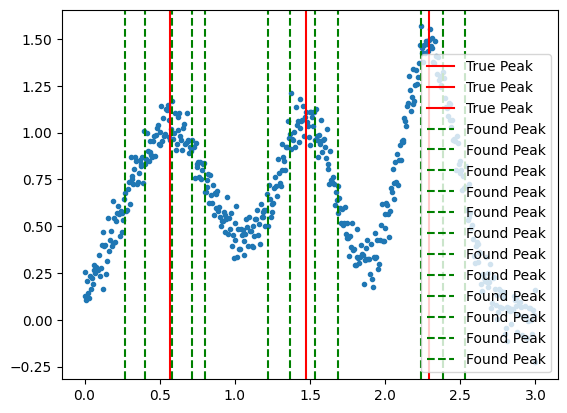

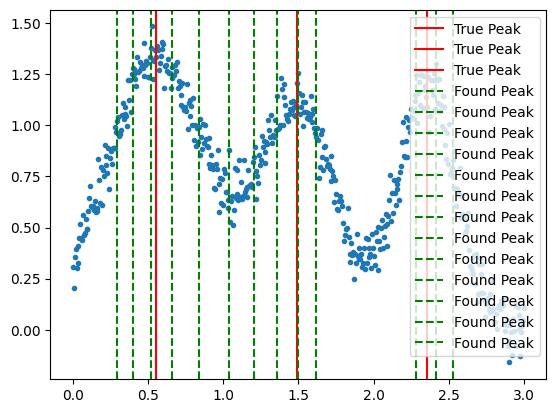

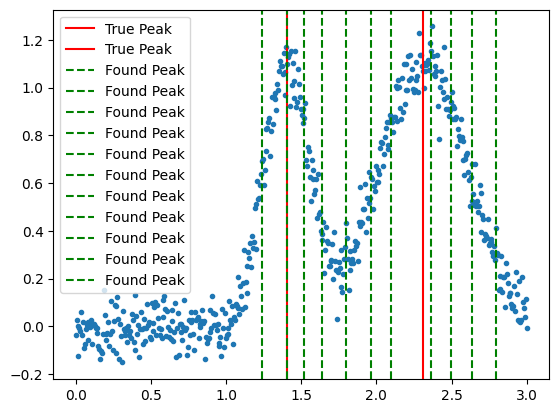

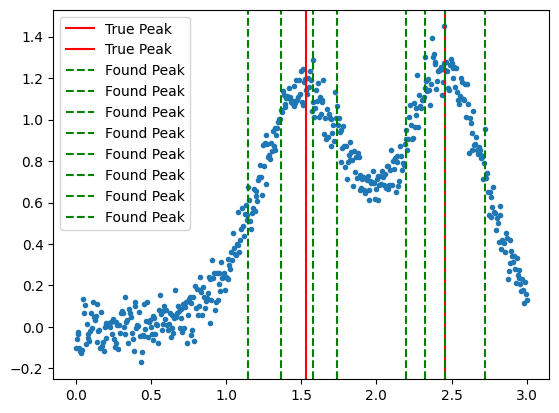

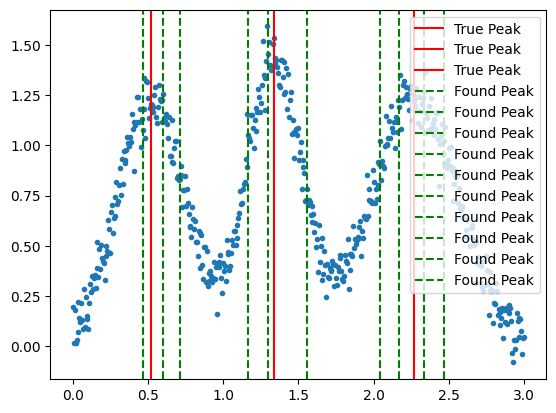

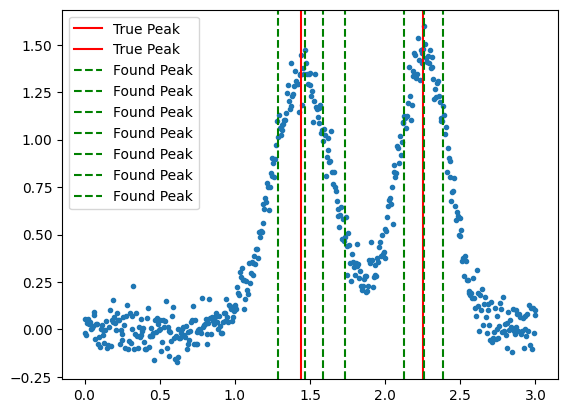

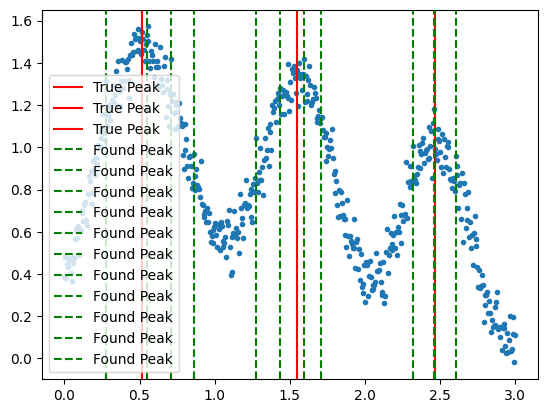

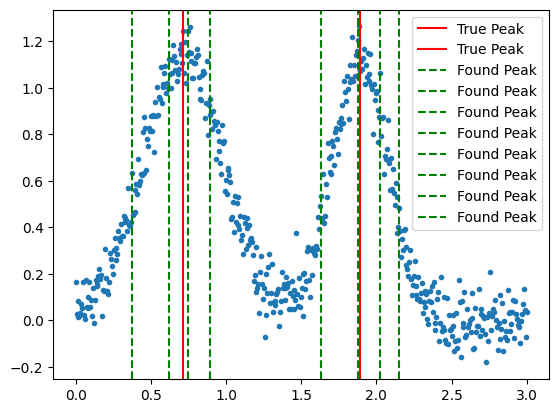

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

np.random.seed(9999)

def is_good_peak(mu, min_dist=0.8):
    if mu is None:
        return False
    smu = np.sort(mu)
    if smu[0] < 0.5:
        return False
    if smu[-1] > 2.5:
        return False
    for p, n in zip(smu, smu[1:]):
        if abs(p-n) < min_dist:
            return False
    return True

# --- Generate datasets ---
maxx = 3
ndata = 500
nset = 10
l = []
answers = []

for iset in range(1, nset):
    npeak = np.random.randint(2,4)
    xs = np.linspace(0,maxx,ndata)
    ys = np.zeros(ndata)
    mu = None

    while not is_good_peak(mu):
        mu = np.random.random(npeak)*maxx
    for ipeak in range(npeak):
        m = mu[ipeak]
        sigma = np.random.random()*0.3 + 0.2
        height = np.random.random()*0.5 + 1
        ys += height*np.exp(-(xs-m)**2/sigma**2)
    ys += np.random.randn(ndata)*0.07
    l.append(ys)
    answers.append(mu)

p6_ys = l
p6_xs = np.linspace(0,maxx,ndata)
p6_answers = answers

# --- Parabola fitting helper ---
def fit_parabola(xs, ys):
    # fit y = a x^2 + b x + c
    A = np.vstack([xs**2, xs, np.ones_like(xs)]).T
    coeffs, _, _, _ = np.linalg.lstsq(A, ys, rcond=None)
    a, b, c = coeffs
    if a >= 0:
        return None, None  # not a peak
    x_peak = -b / (2*a)
    y_peak = c - b**2 / (4*a)
    return x_peak, y_peak

# --- Our peak finder ---
def find_peaks_custom(xs, ys, distance=20):
    # Step 1: find rough peaks
    peaks, _ = find_peaks(ys, distance=distance, height=np.mean(ys))
    result = []
    
    for p in peaks:
        # Step 2: fit around the peak (e.g., ±2 points)
        left = max(0, p-2)
        right = min(len(xs), p+3)
        x_window = xs[left:right]
        y_window = ys[left:right]
        if len(x_window) < 3:
            continue
        x_peak, y_peak = fit_parabola(x_window, y_window)
        if x_peak is not None and 0 <= x_peak <= 3:
            result.append((x_peak, y_peak))
    return result

# --- Evaluate on datasets ---
success = 0
for ys, true_mu in zip(p6_ys, p6_answers):
    found = find_peaks_custom(p6_xs, ys)
    found_x = [fx for fx, _ in found]
    plt.figure()
    plt.plot(p6_xs, ys, '.')
    for a in true_mu:
        plt.axvline(a, color='red', label='True Peak')
    for fx, fy in found:
        plt.axvline(fx, color='green', linestyle='--', label='Found Peak')
    plt.legend()
    
    # Check if we detected all true peaks roughly
    if len(found_x) >= len(true_mu) - 1:  # allow 1 miss
        success += 1

print(f"✅ Successfully detected peaks in {success}/9 datasets")